# Setup and Load Data

In [1]:
import tensorflow as tf
import os

In [2]:
#To avoid out of memory errors by setting GPU memory consumption growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

# Removing dodgy images

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir='data'

In [5]:
image_exts=['jpeg','jpg','bmp','png']

In [6]:
os.listdir(data_dir)

['Happy', 'Sad']

In [7]:
# Returns every image in the files
#os.listdir(os.path.join(data_dir,'Happy'))

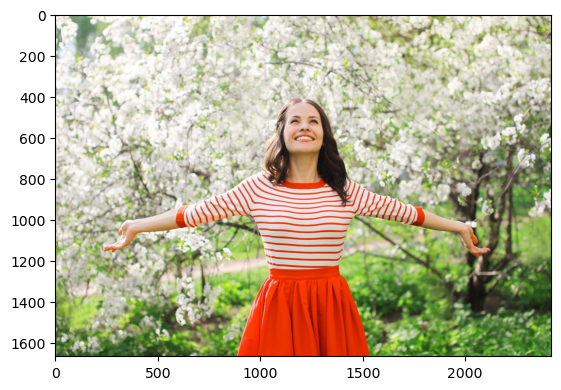

In [8]:
img=cv2.imread(os.path.join('data','happy','happiness.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
for image in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)#check if it reads into cv2
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

NameError: name 'image_class' is not defined

## Load Data & Preprocessing

In [181]:
import numpy as np

In [182]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 209 files belonging to 2 classes.


In [183]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [184]:
data_iterator=data.as_numpy_iterator()

In [185]:
#get another batch from the iterator
batch = data_iterator.next()
batch[0].shape #32 is batch size, 256x256,3 is color images

(32, 256, 256, 3)

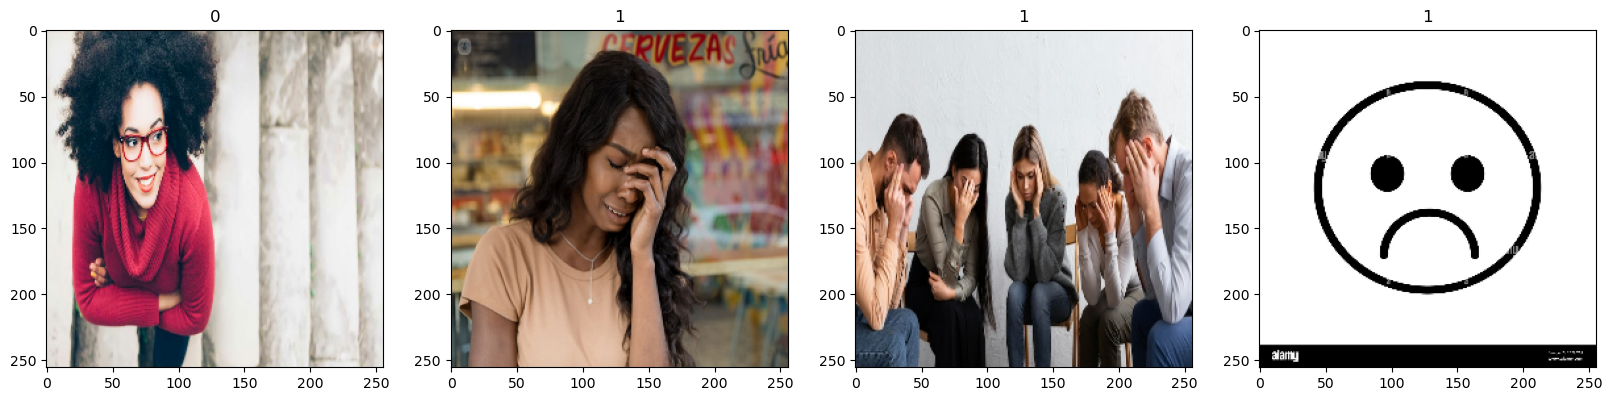

In [186]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
#From images class 1 is sad and 0 is happy

# Preprocess Data

## Scale Data

In [187]:
data=data.map(lambda x,y: (x/255,y))

In [188]:
data.as_numpy_iterator().next()[0].max()

1.0

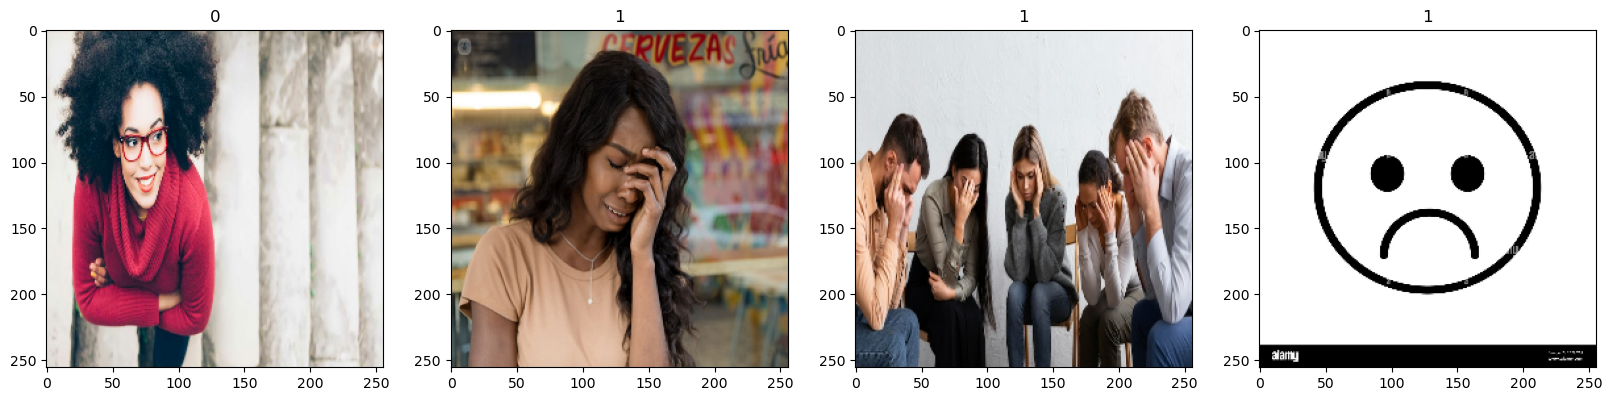

In [189]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [190]:
len(data)#Total batches

7

In [191]:
train_size=int(len(data)*.7)
#Training size batch
train_size

4

In [192]:
val_size=int(len(data)*.2)+1
#Validation size batch
val_size

2

In [193]:
test_size=int(len(data)*.1)+1
#Test size batch
test_size

1

In [194]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# Deep Model

## Build Deep Learning Model

In [195]:
from tensorflow.keras.models import Sequential
#Layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [196]:
model=Sequential()

In [197]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(36,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [198]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [199]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 36)      5220      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 36)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 60, 60, 16)        5200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 16)      

# Train

In [200]:
logdir='logs'

In [201]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [202]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 3s 505ms/step - loss: 2.0779 - accuracy: 0.5859 - val_loss: 1.2980 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 2s 490ms/step - loss: 1.0585 - accuracy: 0.3906 - val_loss: 0.7070 - val_accuracy: 0.3438
Epoch 3/20
4/4 [==============================] - 2s 489ms/step - loss: 0.6814 - accuracy: 0.6172 - val_loss: 0.6654 - val_accuracy: 0.6406
Epoch 4/20
4/4 [==============================] - 2s 499ms/step - loss: 0.6464 - accuracy: 0.6484 - val_loss: 0.6451 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 2s 484ms/step - loss: 0.5698 - accuracy: 0.7188 - val_loss: 0.5294 - val_accuracy: 0.7969
Epoch 6/20
4/4 [==============================] - 2s 494ms/step - loss: 0.5154 - accuracy: 0.7422 - val_loss: 0.4744 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 2s 512ms/step - loss: 0.4980 - accuracy: 0.7578 - val_loss: 0.7812 - val_accuracy: 0.5469
Epoch 8/20
4/4 [====

## Plot Performance

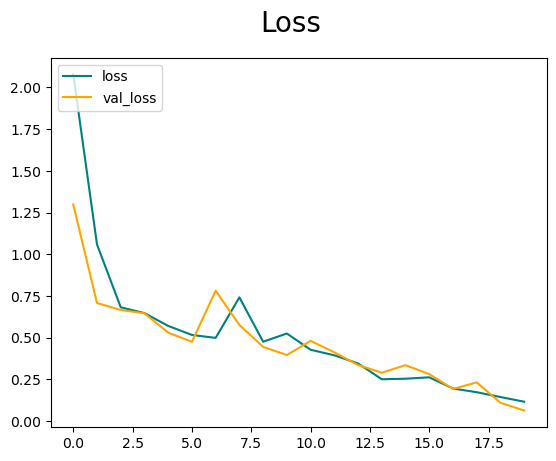

In [203]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

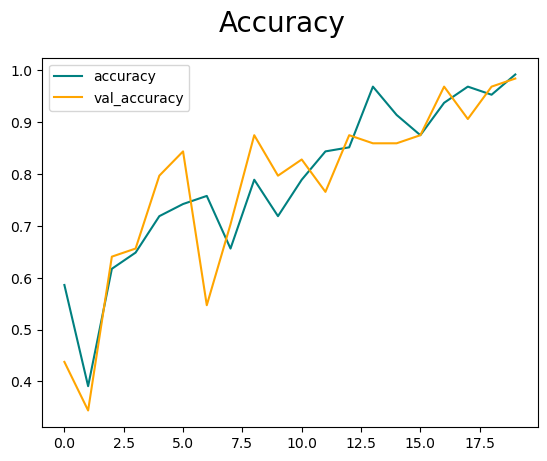

In [204]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [205]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [206]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [207]:
len(test)

1

In [208]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 66ms/step


In [209]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:0.6666666865348816,Accuracy:0.9411764740943909


## Test images

In [226]:
def returnans(yhat):
    if (yhat>0.5):
        print("Sad")
    else:
        print("Happy")

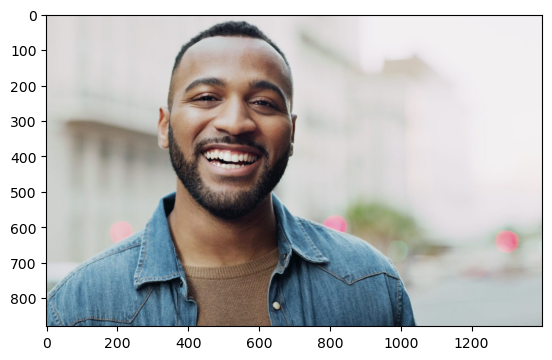

In [227]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

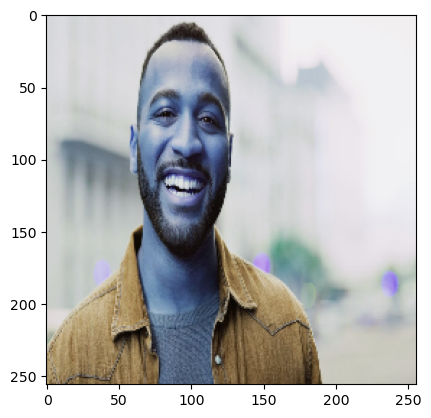

In [228]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [229]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 17ms/step


array([[0.06977709]], dtype=float32)

In [230]:
returnans(yhat)

Happy


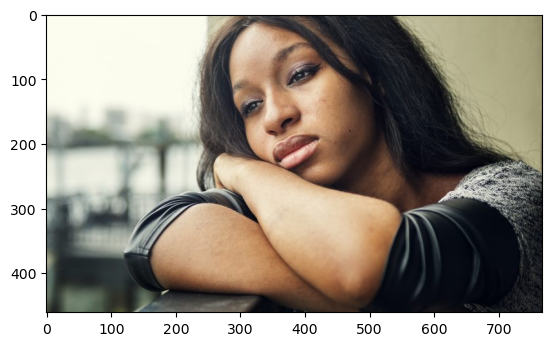

In [231]:
img = cv2.imread('sadtest.jfif')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

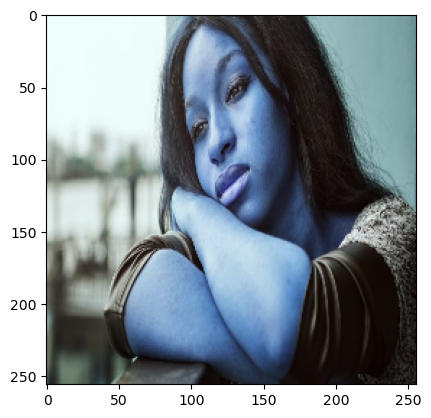

In [232]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [234]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 16ms/step


array([[0.98276895]], dtype=float32)

In [235]:
returnans(yhat)

Sad


# Save Model

In [236]:
from tensorflow.keras.models import load_model

In [237]:
model.save(os.path.join('models','happysadmodel.h5'))